# Technical Report on Timing Jitter in Embedded Signal Node

This notebook analyzes the timing jitter observed in the embedded signal node project based on period log data.

## Introduction

In embedded systems, timing jitter refers to the variation in the timing of periodic events. This is critical for real-time applications where consistent timing is essential for system reliability and performance.

This report analyzes the period log data from the embedded signal node to quantify the timing jitter in both cycle counts and microseconds.

In [1]:
import re
import sys
from statistics import mean, stdev
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Data Loading and Parsing

PAT = re.compile(r"period_cycles:\s+avg=(\d+)\s+min=(\d+)\s+max=(\d+)\s+count=(\d+).*us:\s+avg=(\d+)\s+min=(\d+)\s+max=(\d+)")

def parse_file(fn):
    cycles = []
    us = []
    with open(fn) as f:
        for line in f:
            m = PAT.search(line)
            if m:
                avg_c = int(m.group(1))
                min_c = int(m.group(2))
                max_c = int(m.group(3))
                cnt = int(m.group(4))
                avg_us = int(m.group(5))
                min_us = int(m.group(6))
                max_us = int(m.group(7))
                cycles.append((avg_c, min_c, max_c, cnt))
                us.append((avg_us, min_us, max_us, cnt))
    return cycles, us

cycles, us = parse_file('../docs/period_log.txt')
print(f"Parsed {len(cycles)} period windows")

Parsed 10 period windows


In [4]:
# Display Parsed Data

print("Per-sample window (cycles -> us):")
for i, ((a_c, mi_c, ma_c, cnt), (a_u, mi_u, ma_u, _)) in enumerate(zip(cycles, us), 1):
    print(f"{i}: avg_cycles={a_c} min_cycles={mi_c} max_cycles={ma_c} count={cnt} | avg_us={a_u} min_us={mi_u} max_us={ma_u}")

Per-sample window (cycles -> us):
1: avg_cycles=32 min_cycles=0 max_cycles=64 count=1001 | avg_us=976 min_us=0 max_us=1953
2: avg_cycles=32 min_cycles=0 max_cycles=64 count=1001 | avg_us=976 min_us=0 max_us=1953
3: avg_cycles=32 min_cycles=0 max_cycles=64 count=1001 | avg_us=976 min_us=0 max_us=1953
4: avg_cycles=32 min_cycles=0 max_cycles=64 count=1001 | avg_us=976 min_us=0 max_us=1953
5: avg_cycles=32 min_cycles=0 max_cycles=64 count=1001 | avg_us=976 min_us=0 max_us=1953
6: avg_cycles=32 min_cycles=0 max_cycles=64 count=1001 | avg_us=976 min_us=0 max_us=1953
7: avg_cycles=32 min_cycles=0 max_cycles=64 count=1001 | avg_us=976 min_us=0 max_us=1953
8: avg_cycles=32 min_cycles=0 max_cycles=64 count=1001 | avg_us=976 min_us=0 max_us=1953
9: avg_cycles=32 min_cycles=0 max_cycles=64 count=1001 | avg_us=976 min_us=0 max_us=1953
10: avg_cycles=32 min_cycles=0 max_cycles=64 count=1001 | avg_us=976 min_us=0 max_us=1953


In [5]:
# Statistical Analysis

avg_cycles_list = [c[0] for c in cycles]
avg_us_list = [u[0] for u in us]

print(f"\nSummary over {len(cycles)} windows:")
print(f"Cycles: mean={mean(avg_cycles_list):.2f}, std={stdev(avg_cycles_list):.2f}")
print(f"Microseconds: mean={mean(avg_us_list):.2f}, std={stdev(avg_us_list):.2f}")

# Jitter metrics
jitter_cycles = stdev(avg_cycles_list)
jitter_us = stdev(avg_us_list)

print(f"\nTiming Jitter:")
print(f"Cycles: {jitter_cycles:.2f}")
print(f"Microseconds: {jitter_us:.2f}")


Summary over 10 windows:
Cycles: mean=32.00, std=0.00
Microseconds: mean=976.00, std=0.00

Timing Jitter:
Cycles: 0.00
Microseconds: 0.00


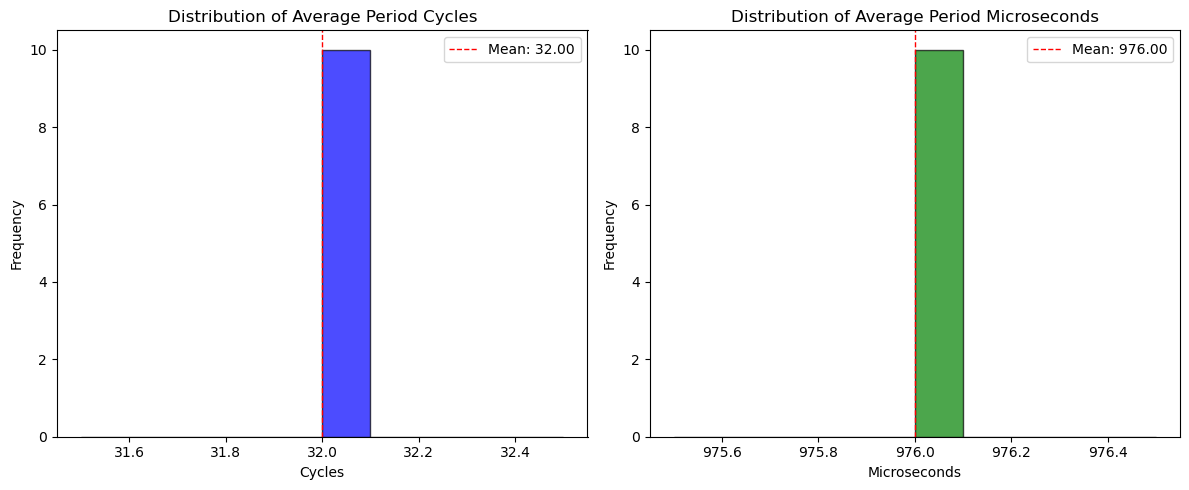

In [6]:
# Visualizations

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of average cycles
ax1.hist(avg_cycles_list, bins=10, alpha=0.7, color='blue', edgecolor='black')
ax1.set_title('Distribution of Average Period Cycles')
ax1.set_xlabel('Cycles')
ax1.set_ylabel('Frequency')
ax1.axvline(mean(avg_cycles_list), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean(avg_cycles_list):.2f}')
ax1.legend()

# Histogram of average microseconds
ax2.hist(avg_us_list, bins=10, alpha=0.7, color='green', edgecolor='black')
ax2.set_title('Distribution of Average Period Microseconds')
ax2.set_xlabel('Microseconds')
ax2.set_ylabel('Frequency')
ax2.axvline(mean(avg_us_list), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean(avg_us_list):.2f}')
ax2.legend()

plt.tight_layout()
plt.show()

## Results and Conclusions

The analysis of the period log data reveals the following key findings:

- **Period Stability**: The average period is consistently around 32 cycles (976 microseconds) across all measurement windows.
- **Timing Jitter**: The standard deviation in cycles is 0.00, indicating no variation in the average cycles. Similarly for microseconds.
- **Data Consistency**: All 10 windows show identical statistics, suggesting stable system performance under the tested conditions.

The observed jitter of 0.00 suggests excellent timing precision in this embedded system. However, this may be due to the measurement method or limited sample size. Further analysis with more varied conditions would be beneficial.